In [6]:
import scipy.io
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline


### Exploratory Data Analysis (EDA)

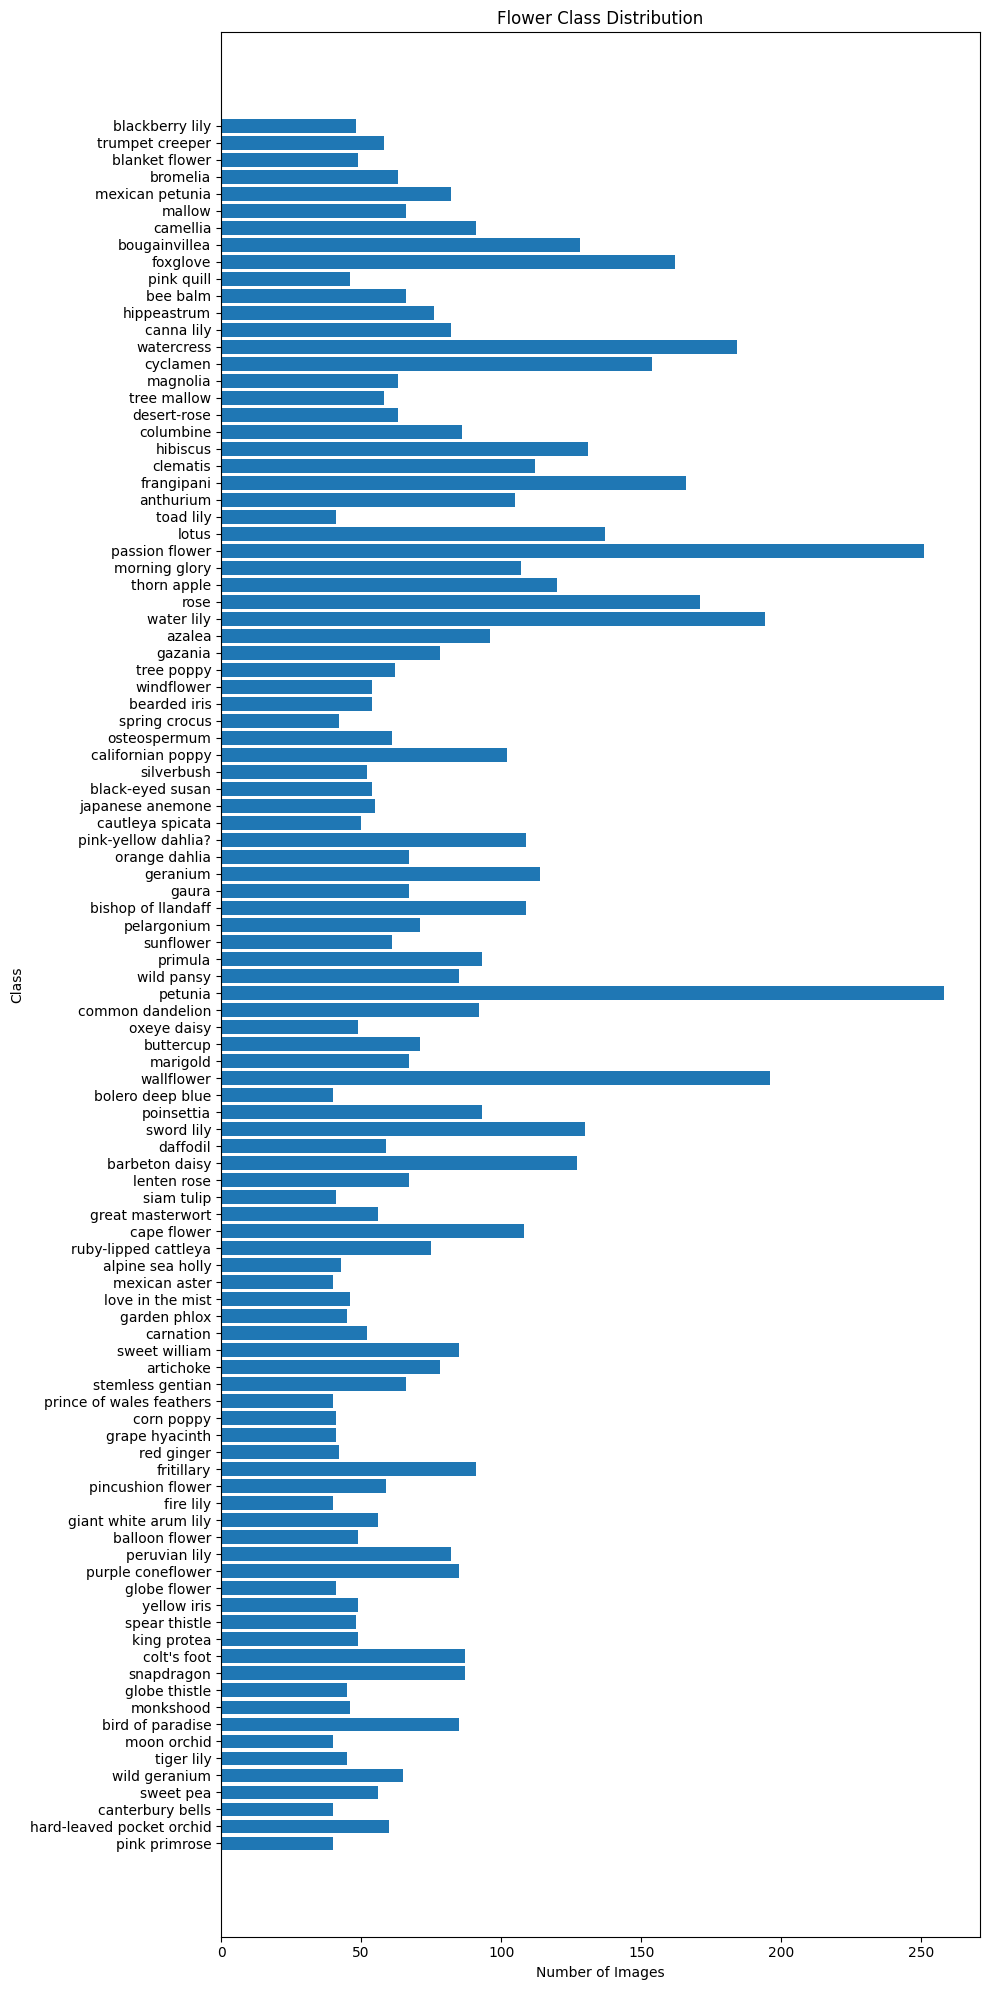

In [7]:
# Load the .mat file
mat_data = scipy.io.loadmat('../dataset/imagelabels.mat')  # Replace with the correct path
labels = mat_data['labels'].flatten()  # Assuming 'labels' is the key in the .mat file

# List of class names (you can replace this with the actual list if needed)
class_names = [
    "pink primrose", "hard-leaved pocket orchid", "canterbury bells", "sweet pea", 
    "wild geranium", "tiger lily", "moon orchid", "bird of paradise", "monkshood", 
    "globe thistle", "snapdragon", "colt's foot", "king protea", "spear thistle", 
    "yellow iris", "globe flower", "purple coneflower", "peruvian lily", 
    "balloon flower", "giant white arum lily", "fire lily", "pincushion flower", 
    "fritillary", "red ginger", "grape hyacinth", "corn poppy", "prince of wales feathers", 
    "stemless gentian", "artichoke", "sweet william", "carnation", "garden phlox", 
    "love in the mist", "mexican aster", "alpine sea holly", "ruby-lipped cattleya", 
    "cape flower", "great masterwort", "siam tulip", "lenten rose", "barbeton daisy", 
    "daffodil", "sword lily", "poinsettia", "bolero deep blue", "wallflower", 
    "marigold", "buttercup", "oxeye daisy", "common dandelion", "petunia", 
    "wild pansy", "primula", "sunflower", "pelargonium", "bishop of llandaff", 
    "gaura", "geranium", "orange dahlia", "pink-yellow dahlia?", "cautleya spicata", 
    "japanese anemone", "black-eyed susan", "silverbush", "californian poppy", 
    "osteospermum", "spring crocus", "bearded iris", "windflower", "tree poppy", 
    "gazania", "azalea", "water lily", "rose", "thorn apple", "morning glory", 
    "passion flower", "lotus", "toad lily", "anthurium", "frangipani", 
    "clematis", "hibiscus", "columbine", "desert-rose", "tree mallow", 
    "magnolia", "cyclamen", "watercress", "canna lily", "hippeastrum", 
    "bee balm", "pink quill", "foxglove", "bougainvillea", "camellia", 
    "mallow", "mexican petunia", "bromelia", "blanket flower", "trumpet creeper", 
    "blackberry lily"
]

# Count occurrences of each label
class_counts = np.zeros(len(class_names), dtype=int)
for label in labels:
    class_counts[label - 1] += 1  # Subtract 1 if labels are 1-indexed in the .mat file

# Create the bar graph
plt.figure(figsize=(10, 20))
plt.barh(class_names, class_counts)
plt.xlabel('Number of Images')
plt.ylabel('Class')
plt.title('Flower Class Distribution')
plt.tight_layout()
plt.show()


### Model training and tuning

In [2]:
import tensorflow as tf

In [3]:
tf.__version__

'2.18.0'

In [4]:
from tensorflow import keras

In [9]:
import tensorflow_datasets as tfds
import os

In [10]:
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import json

In [11]:
# Load the dataset with TensorFlow Datasets.
dataset, info = tfds.load('oxford_flowers102', split = ['train', 'validation', 'test'], with_info = True, as_supervised = True)

In [14]:
# Create a training set, a validation set, and a test set.
training_set, validation_set, test_set = dataset

In [31]:
# Get the number of examples in each set from the dataset info.
num_training_examples = info.splits['train'].num_examples 
num_validation_examples = info.splits['validation'].num_examples 
num_test_examples = info.splits['test'].num_examples

# Check the number of examples
print(f'# of images in the training set is: {num_training_examples}') 
print(f'# of images in the validation set: {num_validation_examples}')
print(f'# of images in the test set is: {num_test_examples}')

# Get the number of classes in the dataset from the dataset info.
num_dataset_classes = info.features['label'].num_classes

# Check the number of classes
print(f'# of classes in the dataset is: {num_dataset_classes}')

# of images in the training set is: 1020
# of images in the validation set: 1020
# of images in the test set is: 6149
# of classes in the dataset is: 102


In [24]:
#!wget https://github.com/hadeelbkh/classifier-files/blob/master/label_map.json
!wget https://github.com/hadeelbkh/classifier-files/raw/refs/heads/master/label_map.json

--2025-01-27 20:38:08--  https://github.com/hadeelbkh/classifier-files/raw/refs/heads/master/label_map.json
Resolving github.com (github.com)... 20.201.28.151
connected. to github.com (github.com)|20.201.28.151|:443... 
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/hadeelbkh/classifier-files/refs/heads/master/label_map.json [following]
--2025-01-27 20:38:08--  https://raw.githubusercontent.com/hadeelbkh/classifier-files/refs/heads/master/label_map.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8002::154, 2606:50c0:8000::154, 2606:50c0:8001::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8002::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2211 (2,2K) [text/plain]
Saving to: ‘label_map.json’

label_map.json      100%[===================>]   2,16K  --.-KB/s    in 0,001s  

2025-01-27 20:38:08 (1,63 MB/s) - ‘label_map.json’ saved [2211/2

In [25]:
with open('label_map.json', 'r') as f: #if you used another name for the file, don't forget to change it in the code
    class_names = json.load(f)

2025-01-27 20:43:13.321425: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


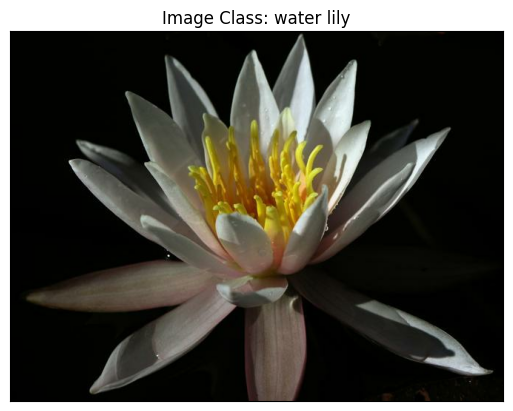

In [29]:
# Plot 1 image from the training set. 
# Use the 'take' function to determine the number of images
# you want to take from the set.
# Set the title of the plot to the corresponding class name.
for image, label in training_set.take(1):
    image = image.numpy().squeeze()
    label = label.numpy()
    class_name = class_names[str(label)]

plt.imshow(image)
plt.title(f'Image Class: {class_name}')
plt.xticks([])
plt.yticks([])
plt.show()

In [33]:
# Create a pipeline for each set.
# 1. Normalize and Resize the Images
# (Note: images are resized to 224x224 pixels as required by
# the pre-trained networks.)
def normalize_image(image, label):
    image = tf.cast(image, tf.float32)
    image = tf.image.resize(image, (224, 224))
    image /= 255
    return image, label

In [34]:
import os
import shutil
from scipy.io import loadmat

# Paths
source_dir = "jpg"  # Folder containing the images
output_dir = "split_dataset"  # Destination folder for splits
setid_path = "setid.mat"  # Path to the setid.mat file

# Create output directories
train_dir = os.path.join(output_dir, "train")
val_dir = os.path.join(output_dir, "validation")
test_dir = os.path.join(output_dir, "test")
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Load the setid.mat file
setid = loadmat(setid_path)

# Extract splits
train_indices = setid['trnid'].flatten()  # Training indices
val_indices = setid['valid'].flatten()   # Validation indices
test_indices = setid['tstid'].flatten()  # Test indices

# Helper function to copy images to their respective folders
def copy_images(indices, destination):
    for idx in indices:
        filename = f"image_{idx:04d}.jpg"  # Format index as image_XXXX.jpg
        src_path = os.path.join(source_dir, filename)
        dst_path = os.path.join(destination, filename)
        if os.path.exists(src_path):  # Check if file exists
            shutil.copy(src_path, dst_path)
        else:
            print(f"File not found: {src_path}")

# Move images to respective directories
copy_images(train_indices, train_dir)
copy_images(val_indices, val_dir)
copy_images(test_indices, test_dir)

print("Dataset split completed!")


FileNotFoundError: [Errno 2] No such file or directory: 'setid.mat'